In [3]:
import pandas as pd
from google.colab import files

In [189]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
fileData = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000 (1).csv


In [159]:
import io
df = pd.read_csv(io.StringIO(fileData['imdb_top_1000.csv'].decode('utf-8')))

In [165]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [167]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [168]:
df = df[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Director', 'Certificate']]

In [169]:
df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Director,Certificate
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont,A
1,The Godfather,1972,"Crime, Drama",9.2,Francis Ford Coppola,A
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,Christopher Nolan,UA
3,The Godfather: Part II,1974,"Crime, Drama",9.0,Francis Ford Coppola,A
4,12 Angry Men,1957,"Crime, Drama",9.0,Sidney Lumet,U


In [170]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Genre              0
IMDB_Rating        0
Director           0
Certificate      101
dtype: int64

In [171]:
df['Certificate'].fillna('U',inplace=True)

In [172]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Director         0
Certificate      0
dtype: int64

In [173]:
top_rates = df.groupby('Series_Title').mean().sort_values('IMDB_Rating', ascending=False).head()
top_rates.reset_index(inplace=True)
top_rates

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0


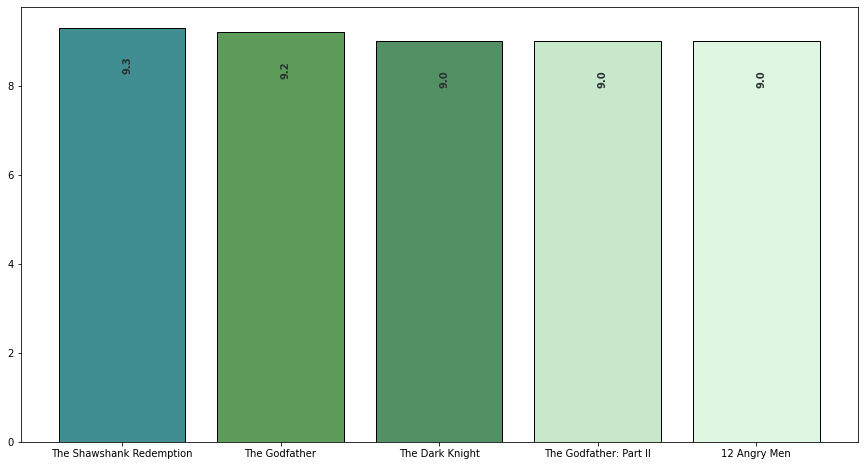

In [188]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Series_Title'],top_rates['IMDB_Rating'],color=['#408E91','#5D9C59','#539165','#C7E8CA','#DDF7E3'],edgecolor='black')

for k,v in top_rates['IMDB_Rating'].items():
    plt.text(k,v-1,str(v),rotation=90,color='#2C3333',weight= 'bold')

In [195]:
top_director = df.groupby('Director').mean().sort_values('IMDB_Rating', ascending=False).head()
top_director.reset_index(inplace=True)
top_director

,Director,IMDB_Rating
0,Frank Darabont,8.95
1,Irvin Kershner,8.70
2,Lana Wachowski,8.70
3,George Lucas,8.60
4,Roberto Benigni,8.60


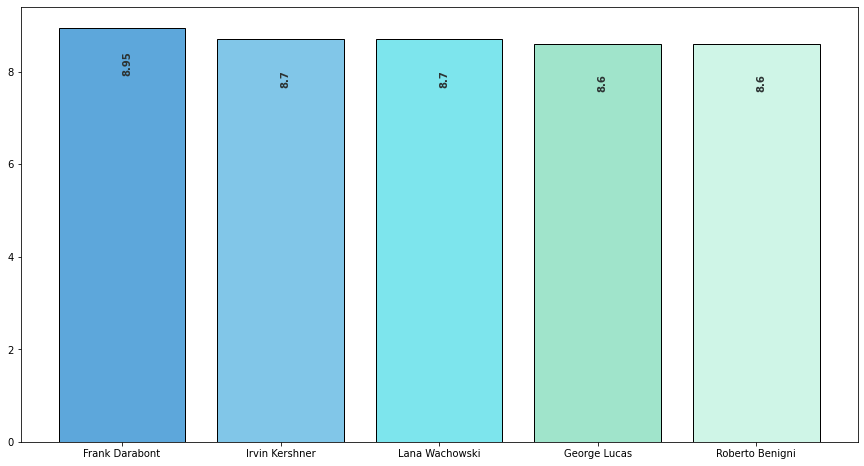

In [178]:
plt.figure(figsize=(15,8))
plt.bar(top_director['Director'],top_director['IMDB_Rating'],color=['#5DA7DB','#81C6E8','#7DE5ED','#A0E4CB','#CFF5E7'],edgecolor='black' )

for k,v in top_director['IMDB_Rating'].items():
    plt.text(k,v-1,str(v),rotation=90,color='#2C3333',weight= 'bold')

In [211]:
IMDB_Genre = df.groupby(by='Genre')['IMDB_Rating'].mean()
IMDB_Genre

Genre
Action, Adventure               8.180000
Action, Adventure, Biography    7.900000
Action, Adventure, Comedy       7.910000
Action, Adventure, Crime        7.600000
Action, Adventure, Drama        8.150000
                                  ...   
Mystery, Romance, Thriller      8.300000
Mystery, Sci-Fi, Thriller       7.800000
Mystery, Thriller               7.977778
Thriller                        7.800000
Western                         8.350000
Name: IMDB_Rating, Length: 202, dtype: float64

<Axes: title={'center': 'Top 10 Genre Berdasarkan Rata-rata Nilai IMDB'}, ylabel='Genre'>

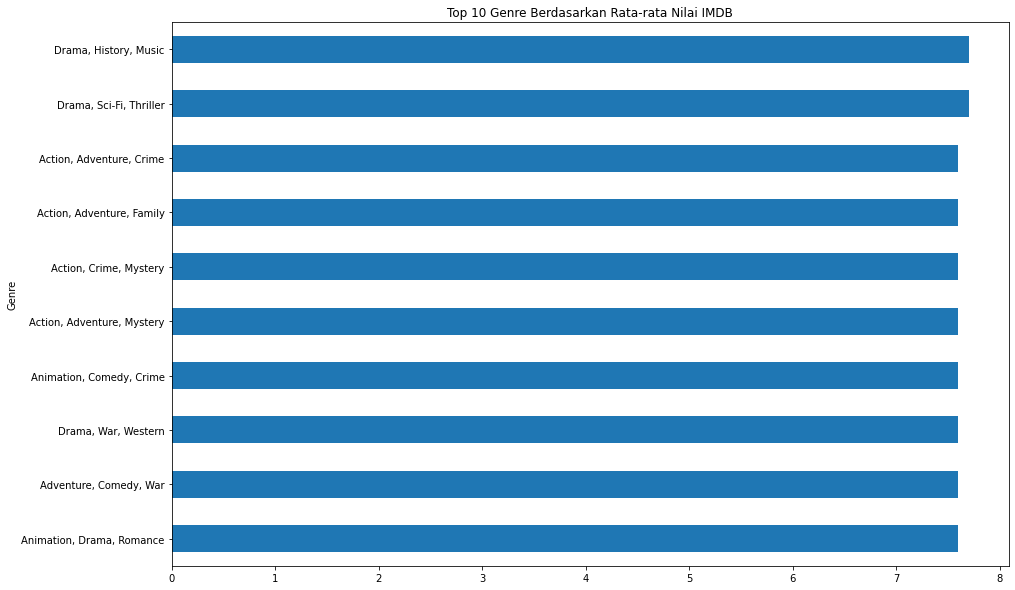

In [212]:
top_genre = IMDB_Genre.sort_values()[:10]
top_genre.plot(kind='barh', figsize=(15, 10), title='Top 10 Genre Berdasarkan Rata-rata Nilai IMDB')

In [236]:
most_certificate = df.groupby('Certificate')['Series_Title'].count()
most_certificate = most_certificate.sort_values(ascending=False)
most_certificate

Certificate
U           335
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
16            1
TV-14         1
TV-MA         1
U/A           1
Unrated       1
Name: Series_Title, dtype: int64